In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.set_option('display.max_columns', None)

In [53]:
df2 = pd.read_csv("bank-marketing.csv")
df = df2.copy()

In [54]:
df.columns = ["Age", "Job", "MaritalStatus", "EducationLevel", "CreditDefault", "ActBalance",
              "HousingLoan", "PersonalLoan", "ContactType", "Day", "Month", "ContactDuration", 
              "NumOfCampaign", "PassedDays", "NumOfPreviousContacts", "OutcomeOfPreviousCampaign", "Class"
             ]


In [55]:
print('COUNT OF DUPLICATES:  {}'.format(df.duplicated().sum()))

COUNT OF DUPLICATES:  0


In [56]:
# Map classes for plotting
dct = {1:"Not subscribed", 2:'Subscribed'}
dfplot = df.copy()
dfplot["Class"] = dfplot["Class"].map(dct)

In [10]:
df.head(3)

,Age,Job,MaritalStatus,EducationLevel,CreditDefault,ActBalance,HousingLoan,PersonalLoan,ContactType,Day,Month,ContactDuration,NumOfCampaign,PassedDays,NumOfPreviousContacts,OutcomeOfPreviousCampaign,Class
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        4521 non-null   int64 
 1   Job                        4521 non-null   object
 2   MaritalStatus              4521 non-null   object
 3   EducationLevel             4521 non-null   object
 4   CreditDefault              4521 non-null   object
 5   ActBalance                 4521 non-null   int64 
 6   HousingLoan                4521 non-null   object
 7   PersonalLoan               4521 non-null   object
 8   ContactType                4521 non-null   object
 9   Day                        4521 non-null   int64 
 10  Month                      4521 non-null   object
 11  ContactDuration            4521 non-null   int64 
 12  NumOfCampaign              4521 non-null   int64 
 13  PassedDays                 4521 non-null   int64 
 14  NumOfPre

# ANALYSIS

## TARGET ANALYSIS

In [57]:
dfplot.head(3)

,Age,Job,MaritalStatus,EducationLevel,CreditDefault,ActBalance,HousingLoan,PersonalLoan,ContactType,Day,Month,ContactDuration,NumOfCampaign,PassedDays,NumOfPreviousContacts,OutcomeOfPreviousCampaign,Class
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,Not subscribed
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,Not subscribed
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,Not subscribed


In [ ]:
# palette = Paired, pastel, cubehelix, rocket

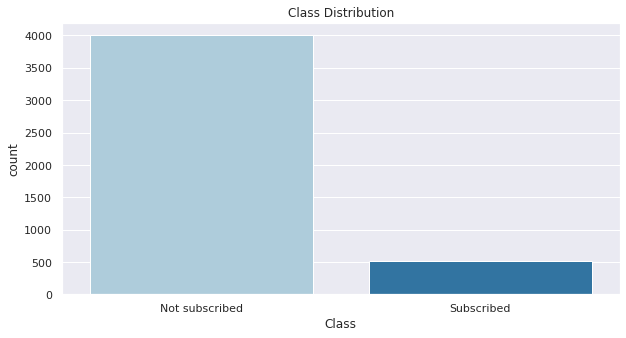

In [132]:
sns.set(style="darkgrid")
counts = sns.countplot(x="Class", data=dfplot, palette="Paired")
plt.title("Class Distribution")
plt.savefig("Class_Distribution.png")

In [51]:
521/4521

0.11523999115239991

In [13]:
df["Class"].value_counts()

1    4000
2     521
Name: Class, dtype: int64

### Key notes

* Problem:
- Highly unbalanced
- Can't use accuracy as the best metric as a result

* Solution:
- Resample i.e 
    i. Undersample Class 1 
        - Can cause loss of information
    ii. Oversample Class 2
        - Causes overfishing
        - try imbalance-learn SMOTE (sythetic minority oversampling technique
using imbalance-learn library SMOTE or NearMiss (SMOTEC because of categorical data)

- use confusion matrix, f1 score, recall, aoc, precision

* NB: Oversampling generally outperforms undersampling although it increases the likelihood of overfitting

## VARIABLE TYPE

### Categorical variables

In [14]:
# Find the number of categorical variables

categorical_vars = [x for x in df.columns if df[x].dtype == 'O']
print(categorical_vars)
len(categorical_vars)

['Job', 'MaritalStatus', 'EducationLevel', 'CreditDefault', 'HousingLoan', 'PersonalLoan', 'ContactType', 'Month', 'OutcomeOfPreviousCampaign']


9

In [15]:
# View and analyse the unique elements in the categorical variables
for var in categorical_vars:
    print(f'{var} \t{df[var].unique()} \n')


Job 	['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown'] 

MaritalStatus 	['married' 'single' 'divorced'] 

EducationLevel 	['primary' 'secondary' 'tertiary' 'unknown'] 

CreditDefault 	['no' 'yes'] 

HousingLoan 	['no' 'yes'] 

PersonalLoan 	['no' 'yes'] 

ContactType 	['cellular' 'unknown' 'telephone'] 

Month 	['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec'] 

OutcomeOfPreviousCampaign 	['unknown' 'failure' 'other' 'success'] 



- EducationLevel can possibly be ordered where primary = 0, secondary = 1, tertiary = 2 
- Can I treat 'unknown as null values


### Visualizing each categorical variable:

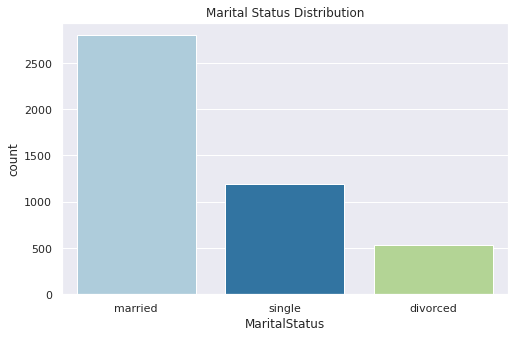

In [153]:
# Marital status
sns.countplot(x="MaritalStatus", data=dfplot, palette="Paired")
plt.title("Marital Status Distribution")
plt.savefig("MaritalStatus Distribution.png")

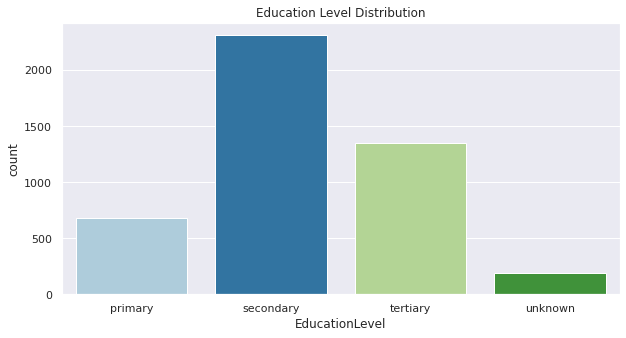

In [133]:
sns.countplot(x="EducationLevel", data=dfplot, palette="Paired")
plt.title("Education Level Distribution")

plt.savefig("Education Level.png")


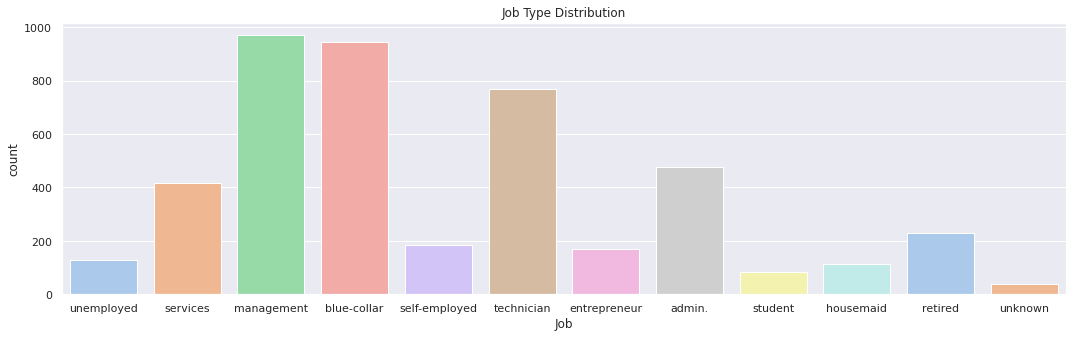

In [134]:
sns.set(rc = {'figure.figsize':(18,5)})
sns.countplot(x="Job", data=df, palette="pastel")
plt.title("Job Type Distribution")
plt.savefig("Job Type Distribution.png")

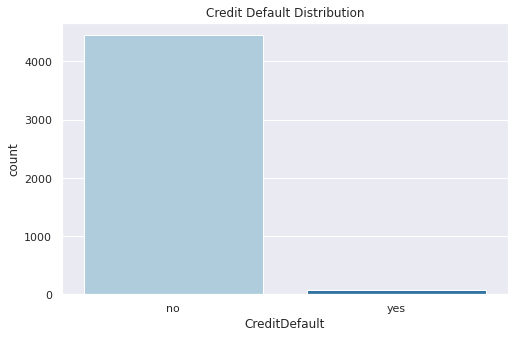

In [135]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.countplot(x="CreditDefault", data=df, palette="Paired")
plt.title("Credit Default Distribution")
plt.savefig("Credit Default.png")

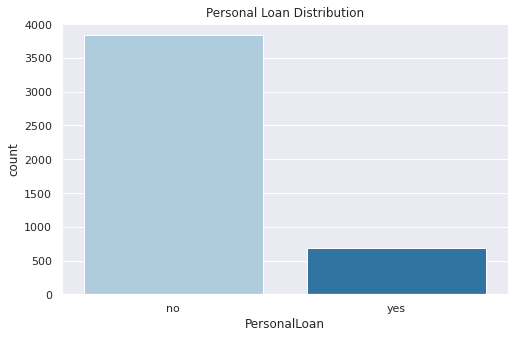

In [154]:

sns.countplot(x="PersonalLoan", data=df, palette="Paired")
plt.title("Personal Loan Distribution")

plt.savefig("Personal Loan.png")

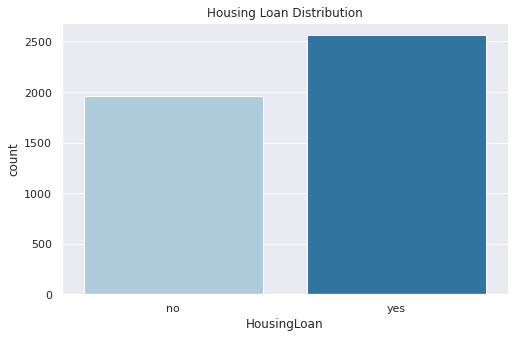

In [136]:
sns.countplot(x="HousingLoan", data=df, palette="Paired")
plt.title("Housing Loan Distribution")
plt.savefig("Housing Loan.png")

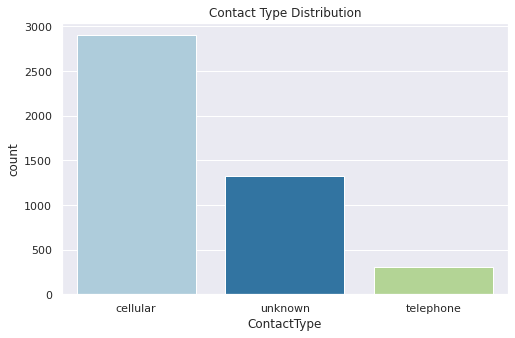

In [137]:
sns.countplot(x="ContactType", data=df, palette="Paired")
plt.title("Contact Type Distribution")
plt.savefig("Contact Type.png")

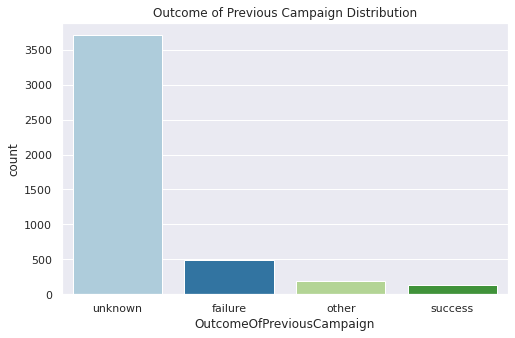

In [138]:
sns.countplot(x="OutcomeOfPreviousCampaign", data=df, palette="Paired")
plt.title("Outcome of Previous Campaign Distribution")
plt.savefig("Outcome.png")

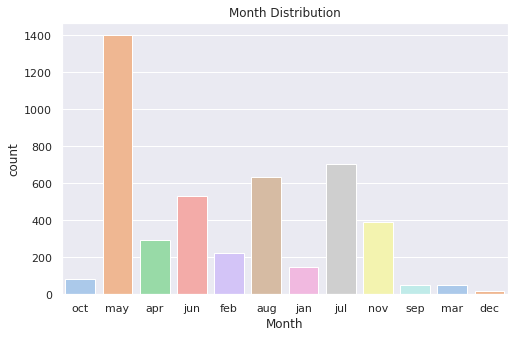

In [156]:
sns.countplot(x="Month", data=df, palette="pastel")
plt.title("Month Distribution")
plt.savefig("Month.png")

### Visualization with respect to classes

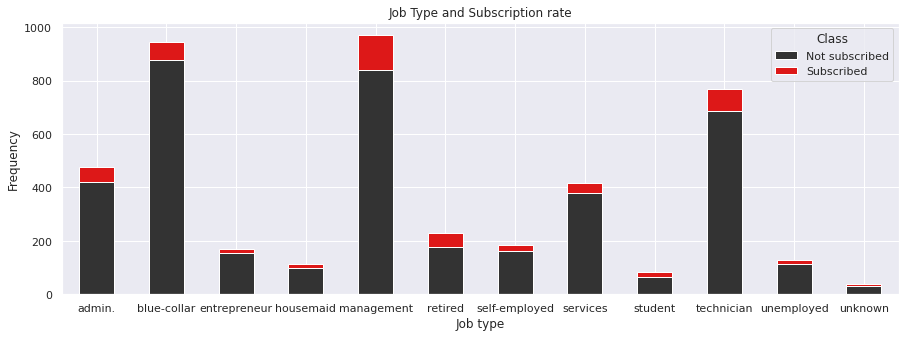

In [139]:

pd.crosstab(dfplot["Job"],dfplot["Class"]).plot(kind="bar", stacked=True, figsize=(15,5), color=['#333333','#dd1818'])
plt.title('Job Type and Subscription rate')
plt.xlabel('Job type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig("CJob.png")

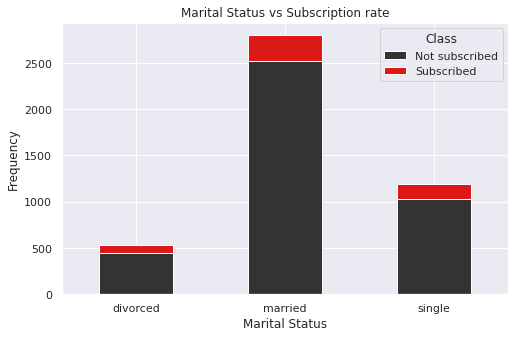

In [140]:
pd.crosstab(dfplot["MaritalStatus"],dfplot["Class"]).plot(kind="bar", stacked=True, figsize=(8,5), color=['#333333','#dd1818'])
plt.title('Marital Status vs Subscription rate')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig("CMarital.png")

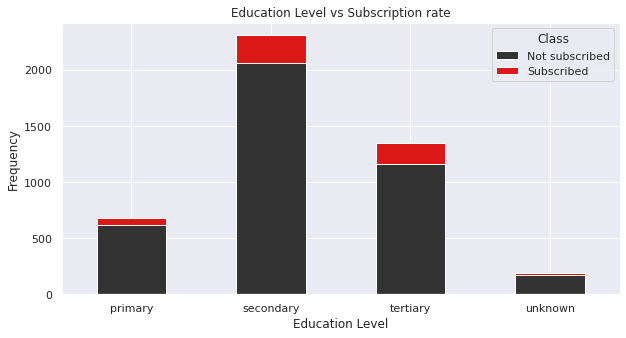

In [141]:
pd.crosstab(dfplot["EducationLevel"],dfplot["Class"]).plot(kind="bar", stacked=True, figsize=(10,5), color=['#333333','#dd1818'])
plt.title('Education Level vs Subscription rate')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig("CEducation.png")

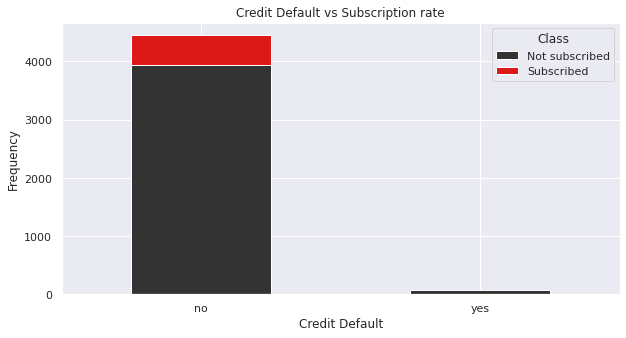

In [142]:
pd.crosstab(dfplot["CreditDefault"],dfplot["Class"]).plot(kind="bar", stacked=True, figsize=(10,5), color=['#333333','#dd1818'])
plt.title('Credit Default vs Subscription rate')
plt.xlabel('Credit Default')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig("CCredit.png")

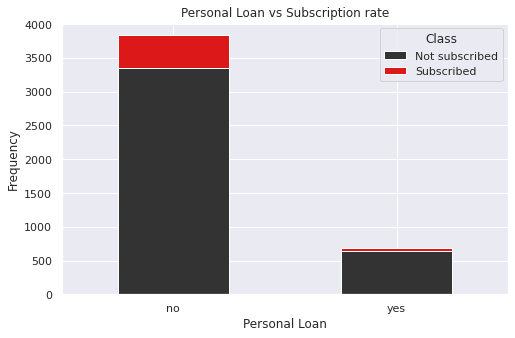

In [143]:
pd.crosstab(dfplot["PersonalLoan"],dfplot["Class"]).plot(kind="bar", stacked=True, figsize=(8,5), color=['#333333','#dd1818'])
plt.title('Personal Loan vs Subscription rate')
plt.xlabel('Personal Loan')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig("CPersonal.png")

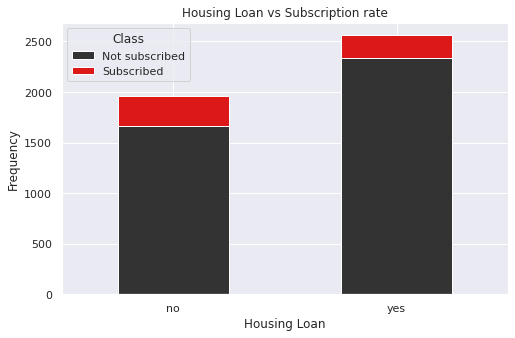

In [144]:
pd.crosstab(dfplot["HousingLoan"],dfplot["Class"]).plot(kind="bar", stacked=True, figsize=(8,5), color=['#333333','#dd1818'])
plt.title('Housing Loan vs Subscription rate')
plt.xlabel('Housing Loan')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig("CHousing.png")

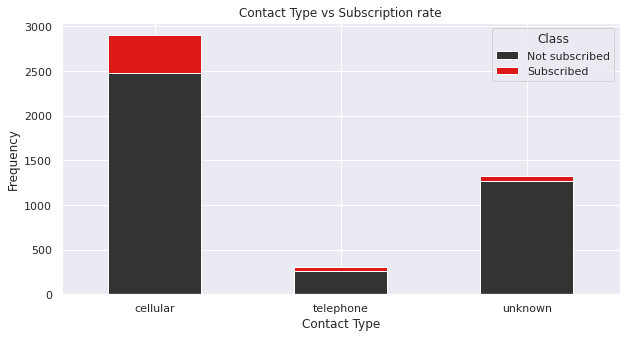

In [145]:
pd.crosstab(dfplot["ContactType"],dfplot["Class"]).plot(kind="bar", stacked=True, figsize=(10,5), color=['#333333','#dd1818'])
plt.title('Contact Type vs Subscription rate')
plt.xlabel('Contact Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig("CContact.png")

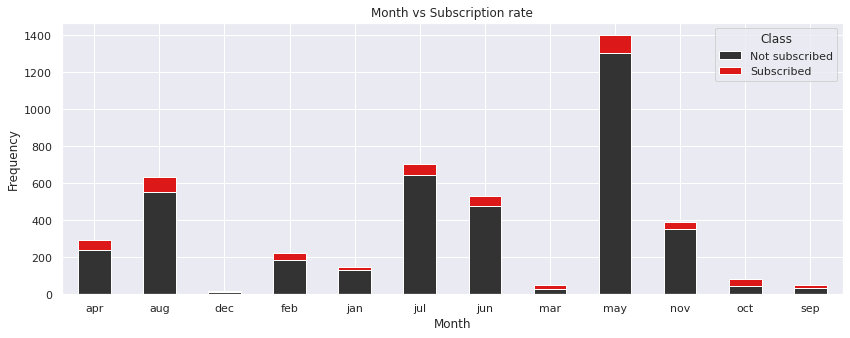

In [146]:
pd.crosstab(dfplot["Month"],dfplot["Class"]).plot(kind="bar", stacked=True, figsize=(14,5), color=['#333333','#dd1818'])
plt.title('Month vs Subscription rate')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig("CMonth.png")

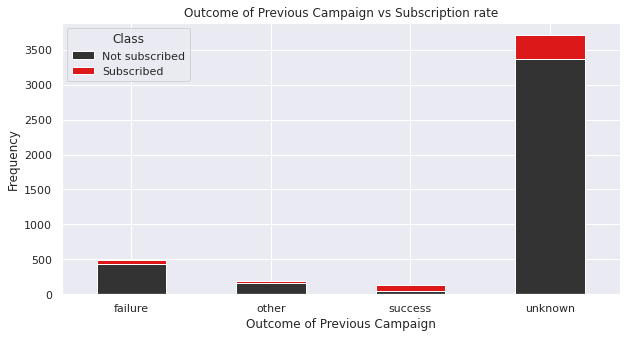

In [147]:
pd.crosstab(dfplot["OutcomeOfPreviousCampaign"],dfplot["Class"]).plot(kind="bar", stacked=True, figsize=(10,5), color=['#333333','#dd1818'])
plt.title('Outcome of Previous Campaign vs Subscription rate')
plt.xlabel('Outcome of Previous Campaign')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig("COutcome.png")

<AxesSubplot:xlabel='ContactType'>

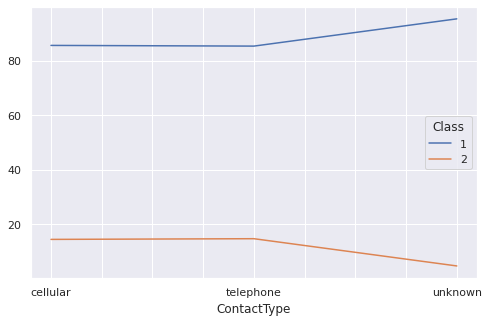

In [105]:
dfgroup = pd.crosstab(df["ContactType"], df["Class"], normalize='index').mul(100)
dfgroup.plot()

### labels in the categorical variables are present everywhere, high percentage, i.e not rare

In [14]:
## Treating 'unknown' values as missing values
dfnan = df.replace(to_replace="unknown", value=np.NaN)

In [15]:
nan_variables = [x for x in df.columns if dfnan[x].isnull().sum() > 0]
nan_variables

['Job', 'EducationLevel', 'ContactType', 'OutcomeOfPreviousCampaign']

In [16]:
dfnan[nan_variables].isnull().mean().sort_values(ascending=False)

OutcomeOfPreviousCampaign    0.819509
ContactType                  0.292856
EducationLevel               0.041363
Job                          0.008405
dtype: float64

SUMMARY ON CATEGORICAL VARIABLES

- Nan values to be dealt with
- Map EducationLevel
- To drop OutcomeOfPreviousCampaign variable or not?
- Further analysis later

In [ ]:
occupation_counts = (df.groupby(['income'])['occupation']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('occupation'))
p = sns.barplot(x="occupation", y="percentage", hue="income", data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

In [38]:
contact_counts.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6 entries, (1, 'cellular') to (2, 'telephone')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   who     6 non-null      float64
dtypes: float64(1)
memory usage: 214.0+ bytes


In [40]:
contact_counts = (df.groupby(['Class'])['ContactType'].value_counts(normalize=True).
                  rename('who').mul(100))
#contact_counts = pd.DataFrame(contact_counts)
#sns.countplot(x='ContactType', hue="Class", data=contact_counts)
contact_counts

Class  ContactType
1      cellular       62.000000
       unknown        31.575000
       telephone       6.425000
2      cellular       79.846449
       unknown        11.708253
       telephone       8.445298
Name: who, dtype: float64

In [44]:
df["EducationLevel"].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [128]:
new_df.var()

Age                      1.118562e+02
ActBalance               9.057922e+06
Day                      6.802402e+01
ContactDuration          6.752547e+04
NumOfCampaign            9.670897e+00
PassedDays               1.002424e+04
NumOfPreviousContacts    2.868153e+00
Class                    1.019823e-01
dtype: float64

### Numerical variables

In [106]:
numerical_vars = [x for x in df.columns if x not in categorical_vars and x != "Class"]
print(numerical_vars)
len(numerical_vars)

['Age', 'ActBalance', 'Day', 'ContactDuration', 'NumOfCampaign', 'PassedDays', 'NumOfPreviousContacts']


7

In [41]:
# Only one discrete variable
discrete_vars = ["Day"]

In [107]:
continuous_vars = ['Age', 'ActBalance', 'ContactDuration', 'NumOfCampaign', 'PassedDays', 'NumOfPreviousContacts']

In [108]:
df[continuous_vars].var().astype('int64')

Age                          111
ActBalance               9057921
ContactDuration            67525
NumOfCampaign                  9
PassedDays                 10024
NumOfPreviousContacts          2
dtype: int64

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');


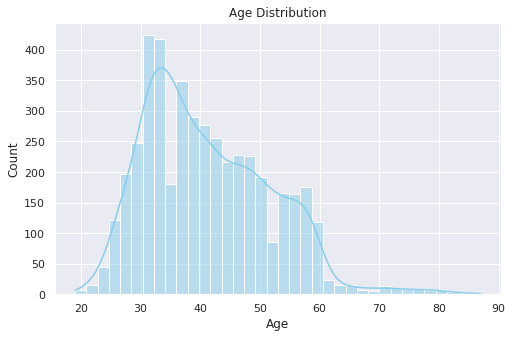

In [148]:
sns.histplot(data=df, x = "Age", kde=True, color='skyblue')
plt.title("Age Distribution")
plt.savefig("Age.png")

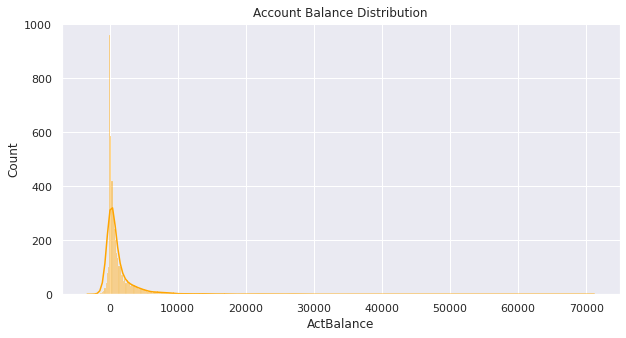

In [149]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data=df, x = "ActBalance", kde=True, color='orange')
plt.title("Account Balance Distribution")
plt.savefig("ActBalance.png")

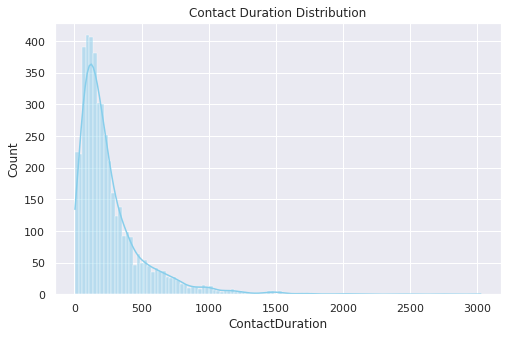

In [150]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.histplot(data=df, x = "ContactDuration", kde=True, color='skyblue')
plt.title("Contact Duration Distribution")
plt.savefig("Contact.png")

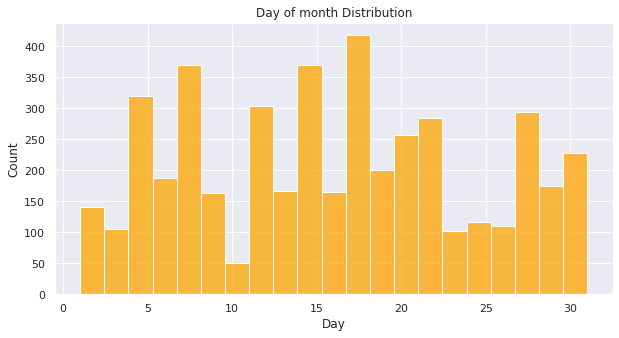

<Figure size 720x360 with 0 Axes>

In [171]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data=df, x = "Day", color='orange')
plt.title("Day of month Distribution")
plt.show()
plt.savefig("Day.png")

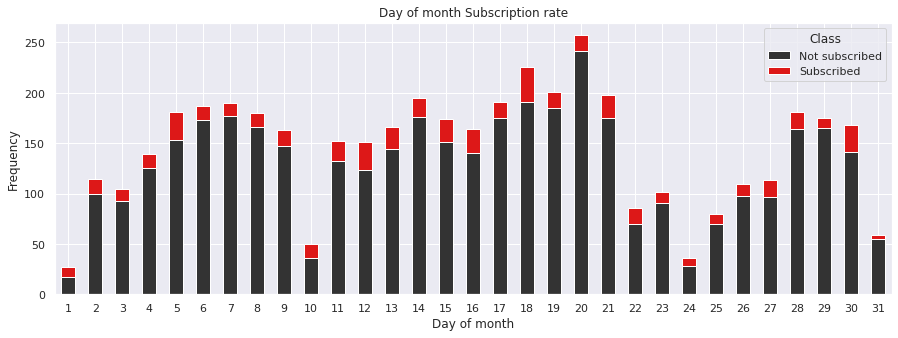

In [172]:
pd.crosstab(dfplot["Day"],dfplot["Class"]).plot(kind="bar", stacked=True, figsize=(15,5), color=['#333333','#dd1818'])
plt.title('Day of month Subscription rate')
plt.xlabel('Day of month')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig("day.png")

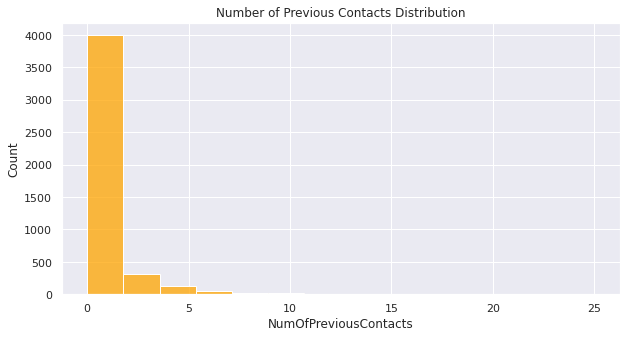

In [166]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data=df, x = "NumOfPreviousContacts", color='orange')
plt.title("Number of Previous Contacts Distribution")
plt.savefig("NofPrev.png")

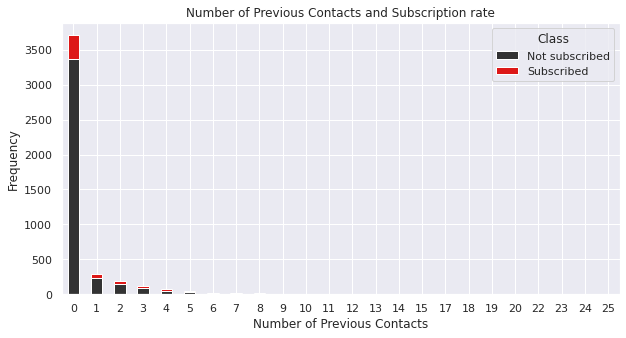

In [168]:
pd.crosstab(dfplot["NumOfPreviousContacts"],dfplot["Class"]).plot(kind="bar", stacked=True, figsize=(10,5), color=['#333333','#dd1818'])
plt.title('Number of Previous Contacts and Subscription rate')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig("CNuofprev.png")

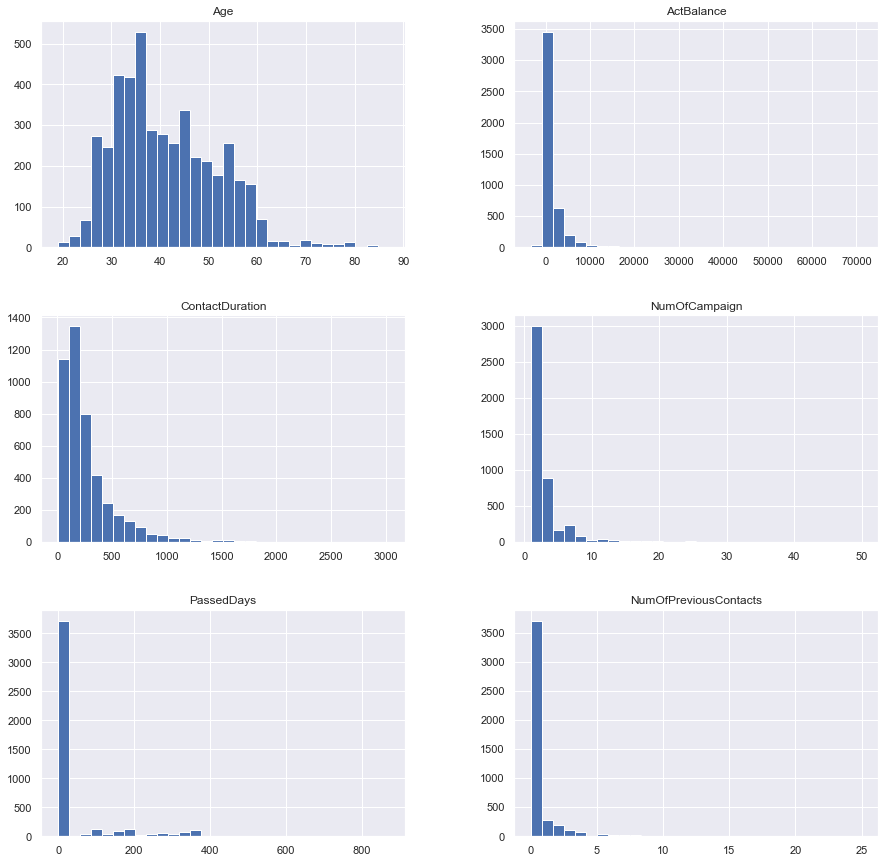

In [46]:
df[continuous_vars].hist(bins=30, figsize=(15,15))
plt.show()

### skewed variables = 'ContactDuration

In [120]:
## correlation between continuous vars
df[numerical_vars].corr()

,Age,ActBalance,Day,ContactDuration,NumOfCampaign,PassedDays,NumOfPreviousContacts
Age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
ActBalance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
Day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
ContactDuration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
NumOfCampaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
PassedDays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
NumOfPreviousContacts,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


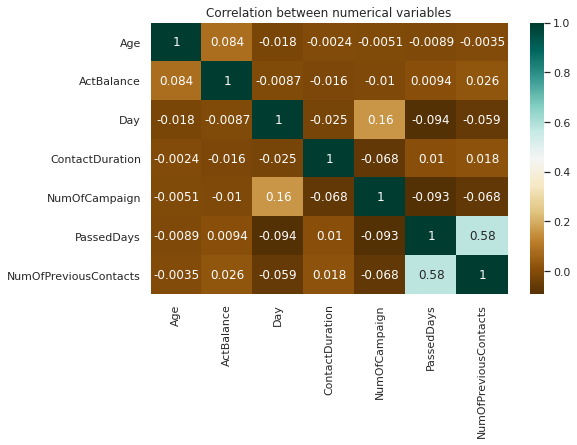

In [151]:
sns.heatmap(df[numerical_vars].corr(), annot=True, cmap='BrBG')
plt.title("Correlation between numerical variables")
plt.savefig("corrnumer.png")

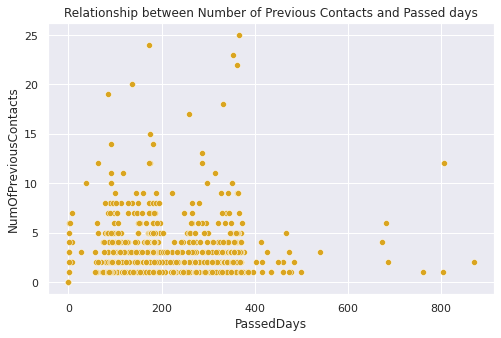

In [152]:
sns.scatterplot(data=df,x='PassedDays',y='NumOfPreviousContacts',color='goldenrod')
plt.title("Relationship between Number of Previous Contacts and Passed days")

plt.savefig("passedcorr")

### PassedDays and NumOfPreviousContacts are partly correlated because PassedDays=-1 when NumOfPreviousContacts = 0
* maybe multiply the two variables 

### PassedDays and NumofPreviousContacts may be correlateds ....hmmm?

- Day of month cannot be converted to day of week: May 2008 and November 2010

- find correlation between variables
if high = strong LINEAR relationship, if low, there might be a strong NON-LINEAR relationship

- check scipy lingress

- stratify when train/test splitting

- Standardization (for continuous numerical variables)
    * Log normalization(np.log) - for variables with high variance (df.var() to check) 
    * feature scaling - StandardScaler for unit variance
    
   
- FEATURE ENGINEERING (for text, timestamps
    * feature engineer the date
    * encode binary variables: users["sub_enc"] = users["subscribed"].apply(lambda val: 1if val == "y"else0) or labelencoder in sklearn
    * one-hot encode other categorical variables
    * aggregate (i.e sum, mean etc) similar numerical variables ex: 

- FEATURE SELECTION
    * use sklearn's automatic methods or
    * remove redundant features and statistically-correlated - check column with correlation say > 0.70

In [ ]:
High Cardinality,,Another way to refer to variables that have a multitude of categories, is to call them variables with high cardinality.

If we have categorical variables containing many multiple labels or high cardinality,then by using one hot encoding, we will expand the feature space dramatically.

One approach that is heavily used in Kaggle competitions, is to replace each label of the categorical variable by the count, this is the amount of times each label appears in the dataset. 
Or the frequency, this is the percentage of observations within that category.

You can follow the following steps to deal with high cardinality in your data:
1) Check for unique values in your feature.
2) Try to drop the category which in less frequent or has a frequency of less then 1% or you can encode it with some special category say("rare"

                                                                                                                            
                                                                                                                                          

In [ ]:
# Frequency encoding
temp = df['card1'].value_counts().to_dict()
df['card1_counts'] = df['card1'].map(temp)

For example, by using frequency encoding of a variable, you can remove all values that appear less than 0.1% 
by replacing them with a new value like -9999 (note that you should use a different value than what you used for NAN).

In [ ]:
# Group by marital, gender, month, or job to view trends
temp = df.groupby('card1')['TransactionAmt'].agg(['mean'])   
    .rename({'mean':'TransactionAmt_card1_mean'},axis=1)
df = pd.merge(df,temp,on='card1',how='left')

In [ ]:
Is this encoding system perfect? Unfortunately no and here are some reasons why:
You are converting one information into two features, which will mathematically assign more weight to it from the algorithm perspective.
Decision trees based algorithms (Random Forest, Gradient Boosted Trees, XGBoost) build their split rules according to one feature at a time. This means that they will fail to process these two features simultaneously whereas the cos/sin values are expected to be considered as one single coordinates system.

In [123]:
# dropping OutcomeOfPreviousCampaign variable
new_df = dfnan.drop("OutcomeOfPreviousCampaign", axis=1, inplace=False)
new_df

,Age,Job,MaritalStatus,EducationLevel,CreditDefault,ActBalance,HousingLoan,PersonalLoan,ContactType,Day,Month,ContactDuration,NumOfCampaign,PassedDays,NumOfPreviousContacts,Class
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,1
3,30,management,married,tertiary,no,1476,yes,yes,NaN,3,jun,199,4,-1,0,1
4,59,blue-collar,married,secondary,no,0,yes,no,NaN,5,may,226,1,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,1
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,NaN,9,may,153,1,-1,0,1
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,1
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,1
